### CRISP-DM PHASE 1:  BUSINESS UNDERSTANDING 

### Business Problem: 
####  Are we collecting enough data to determine if National and State programs are adequately employing United States ‘veterans’ into the U.S. labor market? 
### Data Source: 
#### Data is based on U.S. Census Bureau Veteran Employment Outcome (VEO) Survey. This data is made available through the data sharing partnerships between the U.S. Army, U.S. Census Bureau, and State Labor Mark Information Offices. Data is available at both the state and national level. https://lehd.ces.census.gov/data/veo_experimental.html#tabulation-levels.  Several dataset are available; however, conducting an analysis on DoD Military Occoupational Code (MOS) to Industry Job mapping should show a trend on types of jobs servicemen and servicewomen held and length of employment. 


### Background:
#### Experimental survey is based on data sourced from US Army records. These records are shared with the US Census Bureau for recently discharged enlisted Army Veterans. 
### Business Outcome:
#### Identify trends and gaps in “Veteran” Labor Market by mapping and analyzing data from Army active duty discharged servicemen and servicewomen information to the national database of jobs. The timeframe of data collection is from 2000 and 2015. Data statistics for this Capstone include DoD Occupational Code/Specialization, Employer Industry Code, and veteran demographics (age and location).


In [41]:
# Libraries are imported and aliased correctly
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

### CRISP-DM PHASE 2: DATA UNDERSTANDING (Exploratory Data Analysis)

#### Several datasets are available from the Census Bureau. This dataset includes military occupation mapped to industry. 

In [187]:
# Load the dataset from a CSV file
df = pd.read_excel('C:\Berkeley ML_AI\Module 20\dod_to_industry.xlsx')

# Display the first few rows of the dataset
print(df.head())


   Obs  cohort label_cohort  cohort_years dod_occ_code_level dod_occ_code  \
0    1       0    2000-2015            16                  A            0   
1    2       0    2000-2015            16                  A            0   
2    3       0    2000-2015            16                  A            0   
3    4       0    2000-2015            16                  A            0   
4    5       0    2000-2015            16                  A            0   

  label_dod_occ_code ind_level industry  \
0    All occupations         A       00   
1    All occupations         N       11   
2    All occupations         N       21   
3    All occupations         N       22   
4    All occupations         N       23   

                                  label_industry  ...  y10_p50_earnings  \
0                              All NAICS sectors  ...             52620   
1     Agriculture, Forestry, Fishing and Hunting  ...             36290   
2  Mining, Quarrying, and Oil and Gas Extraction  ...

In [188]:
# Looking at the dataframe's columns and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Obs                 660 non-null    int64 
 1   cohort              660 non-null    int64 
 2   label_cohort        660 non-null    object
 3   cohort_years        660 non-null    int64 
 4   dod_occ_code_level  660 non-null    object
 5   dod_occ_code        660 non-null    object
 6   label_dod_occ_code  660 non-null    object
 7   ind_level           660 non-null    object
 8   industry            660 non-null    object
 9   label_industry      660 non-null    object
 10  y1_emp              660 non-null    int64 
 11  y5_emp              660 non-null    object
 12  y10_emp             660 non-null    object
 13  y1_p25_earnings     660 non-null    int64 
 14  y5_p25_earnings     660 non-null    object
 15  y10_p25_earnings    660 non-null    object
 16  y1_p50_earnings     660 no

In [189]:
# Creating new dataframe with only columns specified
new_df = df[['cohort_years', 'label_cohort','dod_occ_code', 'label_industry', 'industry', 'y1_emp', 'y5_emp', 'y10_emp']]
new_df.head()


,cohort_years,label_cohort,dod_occ_code,label_industry,industry,y1_emp,y5_emp,y10_emp
0,16,2000-2015,0,All NAICS sectors,00,312300,262900,155000
1,16,2000-2015,0,"Agriculture, Forestry, Fishing and Hunting",11,1088,671.5,400
2,16,2000-2015,0,"Mining, Quarrying, and Oil and Gas Extraction",21,4997,3611,2219
3,16,2000-2015,0,Utilities,22,1492,1892,1420
4,16,2000-2015,0,Construction,23,20720,14710,7554


In [190]:
# Obtain information on new dataframe
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cohort_years    660 non-null    int64 
 1   label_cohort    660 non-null    object
 2   dod_occ_code    660 non-null    object
 3   label_industry  660 non-null    object
 4   industry        660 non-null    object
 5   y1_emp          660 non-null    int64 
 6   y5_emp          660 non-null    object
 7   y10_emp         660 non-null    object
dtypes: int64(2), object(6)
memory usage: 41.4+ KB


In [191]:
## Looking at unique values
unique_values = new_df['label_cohort'].unique()
print(unique_values)


['2000-2015' '2000-2007' '2008-2015']


In [192]:
# Finding missing values
new_df.isnull().sum()

cohort_years      0
label_cohort      0
dod_occ_code      0
label_industry    0
industry          0
y1_emp            0
y5_emp            0
y10_emp           0
dtype: int64

<Axes: ylabel='Frequency'>

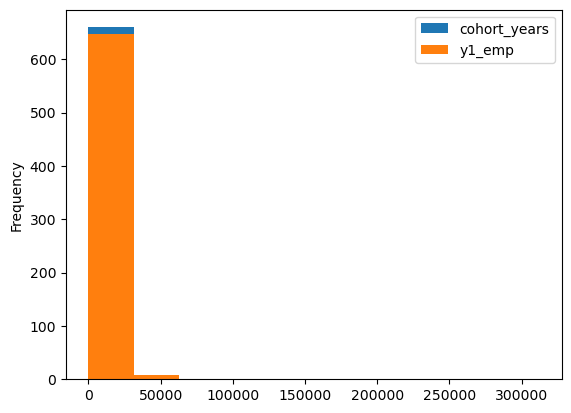

In [193]:
## Looking at distribution of dataframe
new_df.plot(kind='hist')


In [194]:
# Obtain the unique values of the 'label_industry' column
unique_values = new_df['label_industry'].unique()
print(unique_values)

['All NAICS sectors' 'Agriculture, Forestry, Fishing and Hunting'
 'Mining, Quarrying, and Oil and Gas Extraction' 'Utilities'
 'Construction' 'Manufacturing' 'Wholesale Trade' 'Retail Trade'
 'Transportation and Warehousing' 'Information' 'Finance and Insurance'
 'Real Estate and Rental and Leasing'
 'Professional, Scientific, and Technical Services'
 'Management of Companies and Enterprises'
 'Administrative and Support and Waste\nManagement and Remediation Services'
 'Educational Services' 'Health Care and Social Assistance'
 'Arts, Entertainment, and Recreation' 'Accommodation and Food Services'
 'Other Services (except Public Administration)' 'Public Administration'
 'Federal Government']


In [195]:
# Obtain the unique values of the 'industry' column
unique_values = new_df['industry'].unique()
print(unique_values)

['00' '11' '21' '22' '23' '31-33' '42' '44-45' '48-49' '51' '52' '53' '54'
 '55' '56' '61' '62' '71' '72' '81' '92' '99']


In [196]:
# Obtain unique values on the 'dod_occ_code' column
unique_values = new_df['dod_occ_code'].unique()
print(unique_values)


[0 '10X' '11X' '12X' '13X' '14X' '15X' '16X' '17X' '18X']


## CRISP-DM PHASE 3: DATA PREPARATION

In [198]:
# Replace values in the 'industry' column of new_df
new_df['industry'] = new_df['industry'].replace({'31-33': '31', '44-45': '44', '48-49': '48'})

## Replacing with numerical values in the dod_occ_code column
new_df['dod_occ_code'] = new_df['dod_occ_code'].replace({'0':'99',  '10X': '10', '11X': '11', '12X': '12', '13X': '13', '14X': '14', '15X': '15', '16X': '16', '17X': '17', '18X': '18'})

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cohort_years    660 non-null    int64 
 1   label_cohort    660 non-null    object
 2   dod_occ_code    660 non-null    object
 3   label_industry  660 non-null    object
 4   industry        660 non-null    object
 5   y1_emp          660 non-null    int64 
 6   y5_emp          660 non-null    object
 7   y10_emp         660 non-null    object
dtypes: int64(2), object(6)
memory usage: 41.4+ KB


C:\Users\ahove\AppData\Local\Temp\ipykernel_24516\1111976706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['industry'] = new_df['industry'].replace({'31-33': '31', '44-45': '44', '48-49': '48'})
C:\Users\ahove\AppData\Local\Temp\ipykernel_24516\1111976706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dod_occ_code'] = new_df['dod_occ_code'].replace({'0':'99',  '10X': '10', '11X': '11', '12X': '12', '13X': '13', '14X': '14', '15X': '15', '16X': '16', '17X': '17', '18X': '18'})


In [199]:
new_df.tail()

,cohort_years,label_cohort,dod_occ_code,label_industry,industry,y1_emp,y5_emp,y10_emp
655,8,2008-2015,18,"Arts, Entertainment, and Recreation",71,218,100,.
656,8,2008-2015,18,Accommodation and Food Services,72,862,362,.
657,8,2008-2015,18,Other Services (except Public Administration),81,325,148,.
658,8,2008-2015,18,Public Administration,92,1604,848,.
659,8,2008-2015,18,Federal Government,99,1963,1523,.


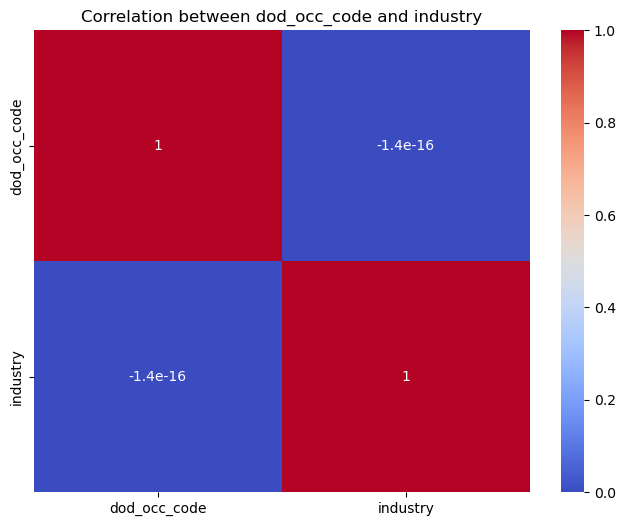

In [200]:
# Plot correlation between dod_occ_code and industry
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['dod_occ_code', 'industry']], annot=True, cmap='coolwarm')
plt.title('Correlation between dod_occ_code and industry')
plt.show()



In [201]:
## Dropping NaN values
new_df = new_df.dropna()


In [202]:
## Creating a new dataframe and only looking at certain columns
new_df_1 = new_df[['cohort_years', 'dod_occ_code', 'industry', 'y1_emp']]

# Set trarget variable
y = new_df_1['y1_emp']

# Set features
X = new_df_1[['cohort_years', 'dod_occ_code', 'industry']]
X.head()


,cohort_years,dod_occ_code,industry
0,16,0,00
1,16,0,11
2,16,0,21
3,16,0,22
4,16,0,23


In [203]:
# Obtain the unique values of the 'y1_emp' column
unique_values = new_df_1['y1_emp'].unique()
print(unique_values)

[312300   1088   4997   1492  20720  29810  14070  30310  19350   8326
   5384   4525  35540   2916  41020   8812  14820   2955  10520   7501
  19830  28220  87590    410   1899    524   8533   9931   4133  10040
   4736   1586   1345   1349   6505    735  13140   2495   2638   1018
   3448   2078   6726   4323  19340      0    234     94   1308   1915
    887   1499    697   2036    290    224   3863    236   2268    426
    473    138    518    398    686   1125  37850    106    496    171
   2251   3008   1382   3414   1483   1556    767    420   9039    437
   4670    929    940    367   1285    619   2075   2452  12150    101
    378    696    363    816    139    190    130    104   1021    345
   2682     82    201    506   2646   5971     50    286    364    175
    546    195    167    119     53   1106     74    772    327    199
     86    173     91    353    762  46280     68    332    121   1353
   3041   1562   3752   2368   1258    556   7407    483   5798   2020
   192

In [204]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Normalize the 'y1_emp' column
new_df_1['y1_emp'] = scaler.fit_transform(new_df_1[['y1_emp']])


C:\Users\ahove\AppData\Local\Temp\ipykernel_24516\2237500939.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1['y1_emp'] = scaler.fit_transform(new_df_1[['y1_emp']])


In [205]:
# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Print the class distribution in the training and test sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print()
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))


Training set shape: (462, 3) (462,)
Test set shape: (198, 3) (198,)
Training set class distribution:
y1_emp
0       0.062771
91      0.010823
933     0.006494
424     0.006494
556     0.006494
          ...   
693     0.002165
1925    0.002165
259     0.002165
1308    0.002165
1021    0.002165
Name: proportion, Length: 396, dtype: float64

Test set class distribution:
y1_emp
0        0.070707
201      0.010101
293      0.010101
224      0.010101
125      0.010101
           ...   
3638     0.005051
678      0.005051
473      0.005051
46280    0.005051
178      0.005051
Name: proportion, Length: 178, dtype: float64


## CRISP-DM PHASE 4: DATA MODELING

#### Building a Baseline Model to compare performance metrics

In [207]:
# Establishing a baseline accuracy for model comparison and evaluation
baseline_accuracy = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", baseline_accuracy)


Baseline Accuracy: 0.06277056277056277


In [208]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X, y)

# Print the pipeline 
print(logreg)

LogisticRegression()


c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [209]:
accuracy = logreg.score(X, y)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.08787878787878788


Comparing baseline accuracy and model accuracy

In [210]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
model_accuracy = logreg.score(X, y)

comparison = pd.DataFrame({'Accuracy': [baseline_accuracy, model_accuracy]}, index=['Baseline', 'Model'])
print(comparison)



          Accuracy
Baseline  0.062771
Model     0.087879


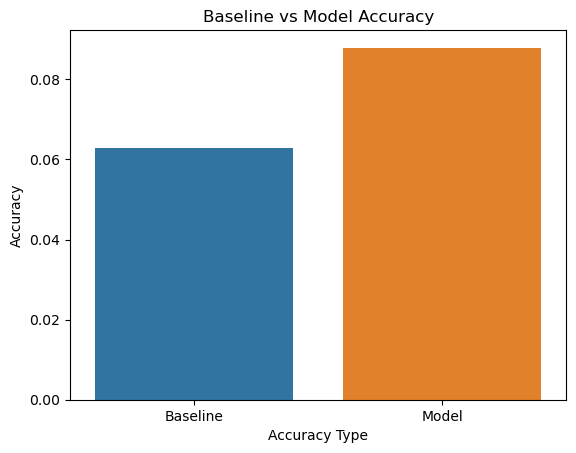

In [211]:
# Plot the accuracy using seaborn
sns.barplot(x=comparison.index, y=comparison['Accuracy'])
plt.title('Baseline vs Model Accuracy')
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.show()


## CRISP-DM PHASE 5: MODEL EVALUATION

In [ ]:
### Modeling
# Use of four classifier models (kNN, Decision Trees, Logistic Regression, and SVM)
# Clear identification of evaluation metrics
# Appropriate interpretation of evaluation metrics
# Clear rationale for use of the evaluation metrics
# Appropriate comparison of the four models

#### Comparing each model's accuracy score

In [212]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create empty lists to store the results
train_scores = []
test_scores = []

# Iterate over each model
for model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Calculate the accuracy scores for training and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a dataframe to compare the models
results = pd.DataFrame({'Model': model_names, 'Train Accuracy': train_scores, 'Test Accuracy': test_scores})
results = results.set_index('Model')

# Print the dataframe
print(results)

# Determine the best model based on the test accuracy
best_model = results['Test Accuracy'].idxmax()
print(f"Best Model: {best_model}")


                     Train Accuracy  Test Accuracy
Model                                             
Logistic Regression        0.090909       0.060606
KNN                        0.192641       0.045455
Decision Tree              0.759740       0.030303
SVM                        0.138528       0.070707
Best Model: SVM


#### Conducting Grid Search on Hyperparmeters on Best Model

In [213]:
# Create a list of model names and models
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

# Create a list of parameter grids for each model
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10]},
    {'n_neighbors': [3, 5, 7, 9]},
    {'max_depth': [None, 5, 10, 15]},
    {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
]

# Perform grid search for each model
best_models = []
for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=5)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

# Print the best hyperparameters for each model
for i, model_name in enumerate(model_names):
    print(f"Best hyperparameters for {model_name}:")
    print(best_models[i])
    print()


c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters for Logistic Regression:
LogisticRegression(C=0.001)

Best hyperparameters for KNN:
KNeighborsClassifier(n_neighbors=9)

Best hyperparameters for Decision Tree:
DecisionTreeClassifier(max_depth=5)

Best hyperparameters for SVM:
SVC(C=0.001, gamma=0.001)



##### Checking to see if this hyperparameter could lead to overfitting

In [220]:
# Create an instance of the LogisticRegression model with 'C' parameter set to 0.001
logreg = LogisticRegression(C=0.001)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Calculate the accuracy scores for training and test data
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

# Print the train and test results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Determine if the model is overfitted
if train_accuracy > test_accuracy:
    print("The model is overfitted.")
else:
    print("The model is not overfitted.")

    


Train Accuracy: 0.06277056277056277
Test Accuracy: 0.0707070707070707
The model is not overfitted.


Checking the performance metrics for each model and creating a dataframe to show the results

In [223]:
# Create empty lists to store the metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model
for model in best_models:
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro' )
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append the scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, 'F1-score': f1_scores})
metrics_df = metrics_df.set_index('Model')

# Print the dataframe
print(metrics_df)



c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWar

                     Accuracy  Precision    Recall  F1-score
Model                                                       
Logistic Regression  0.070707   0.000397  0.005618  0.000742
KNN                  0.055556   0.000739  0.003588  0.001225
Decision Tree        0.055556   0.001642  0.003871  0.002306
SVM                  0.070707   0.000397  0.005618  0.000742


c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting to show the visualization.  The black dotted line indicates best model to use.

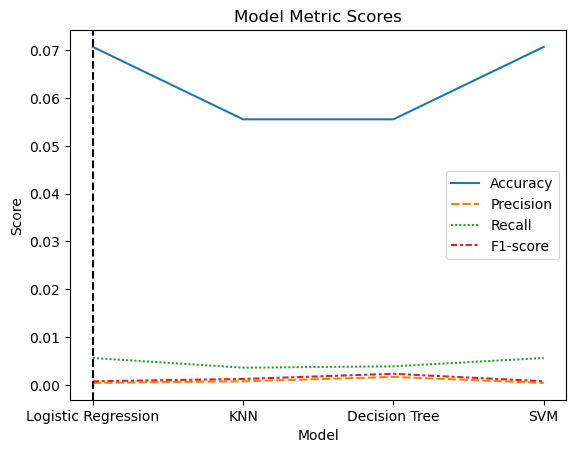

Best Model: Logistic Regression


In [225]:
# Plot the metric scores using a line graph
sns.lineplot(data=metrics_df)

# Highlight the best model
best_model = metrics_df.idxmax().values[0]
plt.axvline(x=best_model, color='black', linestyle='--')

# Set the labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Metric Scores')

# Show the plot
plt.show()

# Print out Best Model
print(f"Best Model: {best_model}")



## CRISP-DM PHASE 6: DEPLOYMENT

Make predictions based on Logistic Regression Model

In [228]:
# Create an instance of the LogisticRegression model with the best hyperparameters
logreg_best = LogisticRegression(C=0.001)

# Fit the model to the training data
logreg_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_best.predict(X_test)



c:\Users\ahove\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


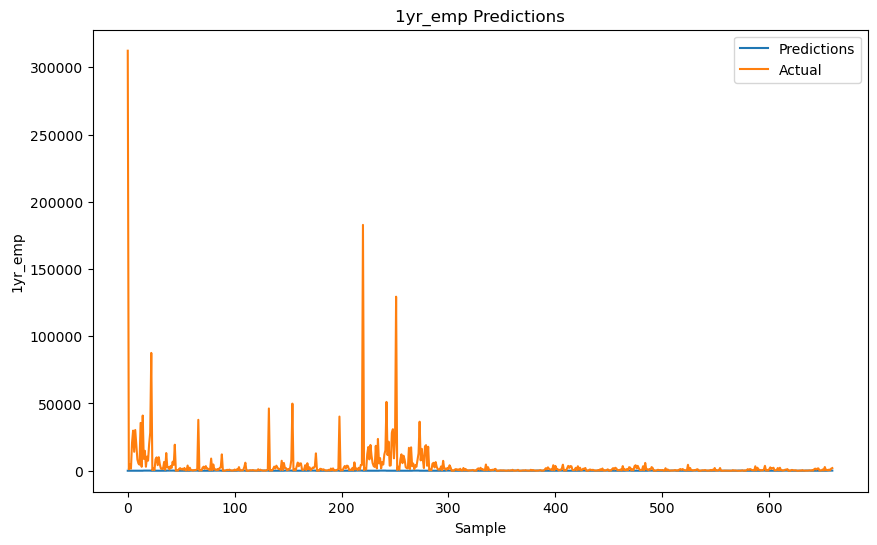

In [230]:
# Make predictions on the '1yr_emp' column
y_pred_1yr_emp = logreg_best.predict(X[['cohort_years', 'dod_occ_code', 'industry']])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_pred_1yr_emp, label='Predictions')
plt.plot(y, label='Actual')
plt.title('1yr_emp Predictions')
plt.xlabel('Sample')
plt.ylabel('1yr_emp')
plt.legend()
plt.show()




#### Conclusion

### Only using the selected data to show number of veterans employeed the first year based on the DoD Occupational Code to Industry is not showing a good turn out. I will have to look into concatenating the other datasets to determine a possible prediction